# Import, loading data and understand the problem 🚤

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import shap

tf.__version__

'2.9.1'

In [2]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [3]:
y = df.pop("target")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 30.9+ KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [6]:
conversion_thal = {"fixed": 1, "normal": 2, "reversible": 3}
df["thal"].unique()

array(['fixed', 'normal', 'reversible', '1', '2'], dtype=object)

In [7]:
df["thal"] = df["thal"].map(conversion_thal)

categorical_features = np.where(df[list(df.columns)].dtypes != float)[0]
categorical_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11])

Ici on fait le choix de ne garder uniquement les valeurs numériques identifiés.

In [8]:
list_numerical = ["age", "thalach", "trestbps", "chol", "oldpeak", "exang"]

X = df[list_numerical]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

# Building the model 

In [11]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

2023-02-05 16:26:29.477145: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [13]:
history = model.fit(
    X_train[list_numerical],
    y_train,
    epochs=100,
    batch_size=10,
    validation_data=(X_test, y_test),
)

Epoch 1/100
22/22 [==============================] - 0s 7ms/step - loss: 0.7351 - accuracy: 0.5189 - val_loss: 0.7376 - val_accuracy: 0.5495
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7056 - accuracy: 0.5896 - val_loss: 0.7164 - val_accuracy: 0.6593
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.6274 - val_loss: 0.6994 - val_accuracy: 0.6703
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.6651 - val_loss: 0.6825 - val_accuracy: 0.7143
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.6934 - val_loss: 0.6724 - val_accuracy: 0.7143
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.7264 - val_loss: 0.6614 - val_accuracy: 0.7473
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.7453 - val_loss: 0.6538 - val_accuracy: 0.7473
Epoch 8/100
2

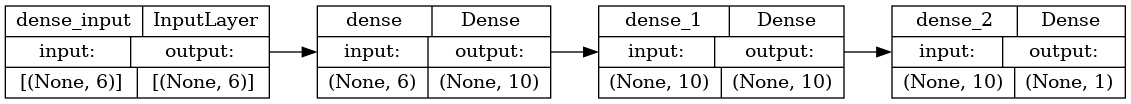

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Accuracy", accuracy)

3/3 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.8132
Accuracy 0.8131868243217468


In [16]:
model.save("classifier_hd")
reloaded_model = tf.keras.models.load_model("classifier_hd")

INFO:tensorflow:Assets written to: classifier_hd/assets


In [17]:
predictions = reloaded_model.predict(X_train)
print(
    "This particular patient had a %.1f percent probability "
    "of having a heart disease, as evaluated by our model." % (100 * predictions[0][0],)
)

7/7 [==============================] - 0s 1ms/step
This particular patient had a 53.2 percent probability of having a heart disease, as evaluated by our model.


# Improve our model 
We plot the history of our val and train loss in order to see if we increase or decrease the number of epochs.

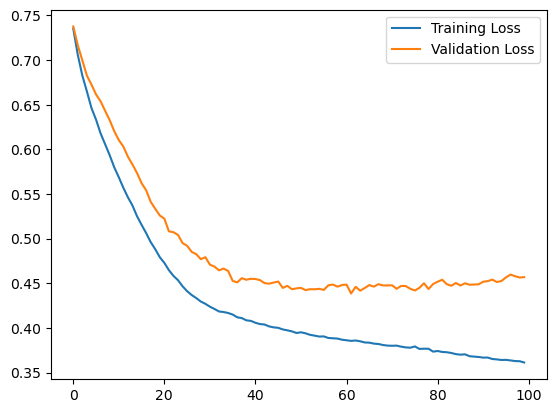

In [27]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

Here we can see that 35 should be a good number of epochs. 

# SHAP 

We use our model and a selection of 50 samples from the dataset to represent typicalf feature values , (the so called background distribution)

In [19]:
explainer = shap.KernelExplainer(model, X_train.iloc[:50, :])

Now we use 500 perterbation samples to estimate the SHAP values for a given prediction (at index location 20). Note that this requires 500 * 50 evaluations of the model.

In [20]:
shap_values = explainer.shap_values(X_train.iloc[20, :], nsamples=500)

In [21]:
shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[20, :])

## Explain many predictions

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Since SHAP values represent a feature’s responsibility for a change in the model output, the plot below represents the change in the dependent variable. Vertical dispersion at a single value of represents interaction effects with other features.

In [22]:
shap_values50 = explainer.shap_values(X_train.iloc[50:100, :], nsamples=500)

  0%|          | 0/50 [00:00<?, ?it/s]

In [23]:
shap.force_plot(explainer.expected_value, shap_values50[0], X_train.iloc[50:100, :])

In [24]:
shap_values = explainer.shap_values(X_train, nsamples=500)
np.shape(shap_values[0])

  0%|          | 0/212 [00:00<?, ?it/s]

(212, 6)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


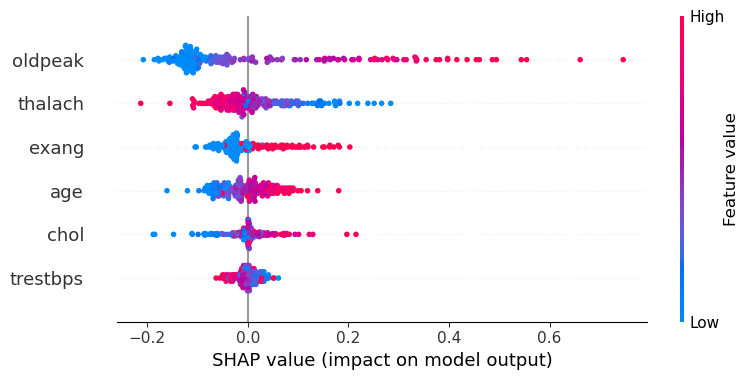

In [25]:
shap.summary_plot(shap_values[0], X_train)

# Catboost

In [26]:
from catboost import CatBoostClassifier